In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

def poisson(l, k, t):
    return ((l*t)**k/math.factorial(k))*math.exp(-l*t)

In [18]:
ts=[1,10,20,90]
l=1
N=10000
events = [list() for t in ts]
for i in range(N):
    for j in range(len(ts)):
        t=ts[j]
        curr_t=0
        occurrences=0
        while(True):
            step = exponential(l)
            curr_t+=step
            if(curr_t>t):
                break
            occurrences+=1
        events[j].append(occurrences)

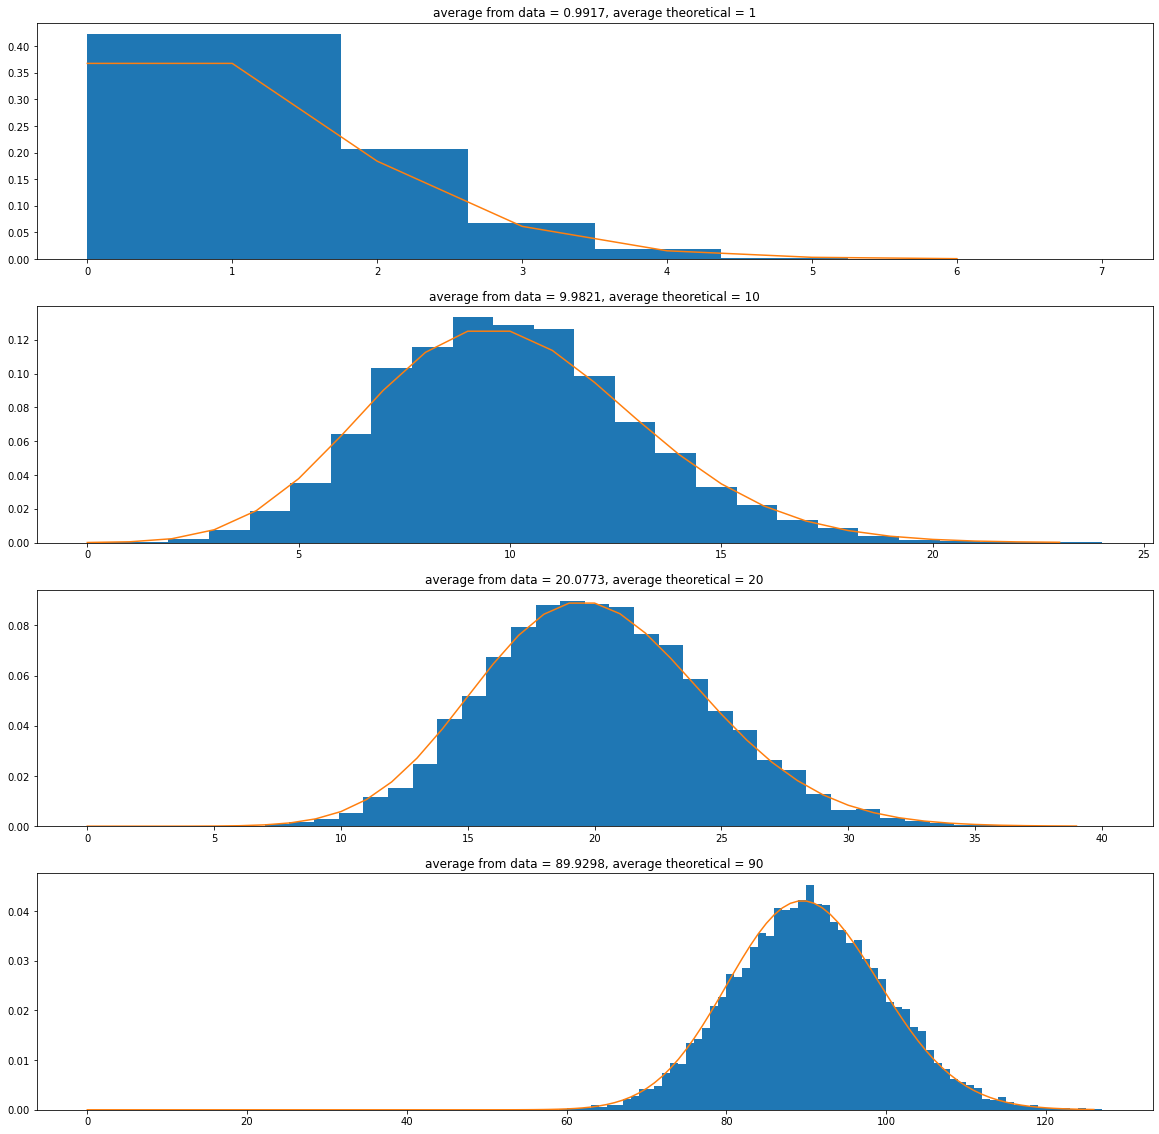

In [19]:
fig,ax = plt.subplots(len(ts),figsize=(20,20))

for i in range(len(ts)):
    max_occurs = max(events[i])
    poisson_data=[]
    for j in range(max_occurs):
        poisson_data.append(poisson(l,j,ts[i]))
    bins = len(set(events[i]))
    avg = sum(events[i])/len(events[i])
    ax[i].set_title("average from data = {}, average theoretical = {}".format(avg,l*ts[i]))
    ax[i].hist(events[i],density=True, bins=bins)
    ax[i].plot(range(max_occurs),poisson_data)